In [70]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics # for the check the error and accuracy
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score

from sklearn import svm # for Support Vector Machine
from sklearn.naive_bayes import GaussianNB # for naive bayes classifier
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier 
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.tree import DecisionTreeClassifier # for decision tree classifier 


In [35]:
# Read imputed datasets (MICE)
df = pd.read_csv("Dataset/processed/breast-cancer-wisconsin-imputed.csv")
df

,sample_id,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


In [36]:
# Remove the sample_id column
df = df.drop(columns=['sample_id'])

# Split the dataset into features/variables (X) and labels/outcome (y)
# Change values of 'class' from [2,4] to [0,1]
X = df.drop(columns=['class'])
y = df['class'].apply(lambda x: 1 if x == 4 else 0)

In [37]:
# Scale the features - Min and Max scaling (sensitive to outliers)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression

In [48]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train classifier
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]

    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [49]:
# report classification results
agreement=(predictions==y).sum()
accuracy=agreement/y.shape[0]
print("The leave-one-out accuracy for the data set is: {0:.4f}".format(accuracy))
print(classification_report(y,predictions))

The leave-one-out accuracy for the data set is: 0.9642
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       458
           1       0.95      0.94      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



<AxesSubplot: >

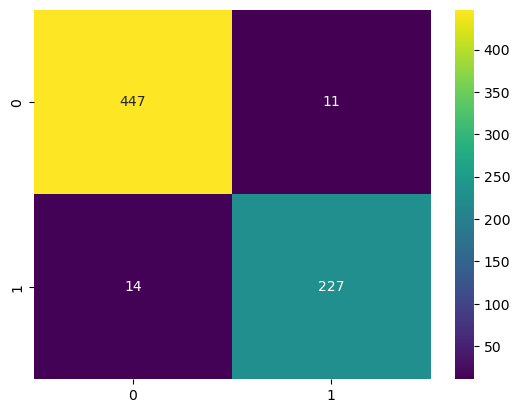

In [50]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')

# SVM

In [54]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train classifier
    clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
        max_iter=-1, probability=True, random_state=None, shrinking=False,
        tol=0.001, verbose=False)
    clf.fit(X_train, y_train)

    # Get prediction
    predicted_y = clf.predict(X_test)
    
    # Get probability
    probability_y = clf.predict_proba(X_test)[:,1]

    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [55]:
# report classification results
agreement=(predictions==y).sum()
accuracy=agreement/y.shape[0]
print("The leave-one-out accuracy for the data set is: {0:.4f}".format(accuracy))
print(classification_report(y,predictions))

The leave-one-out accuracy for the data set is: 0.9571
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       458
           1       0.90      0.99      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



<AxesSubplot: >

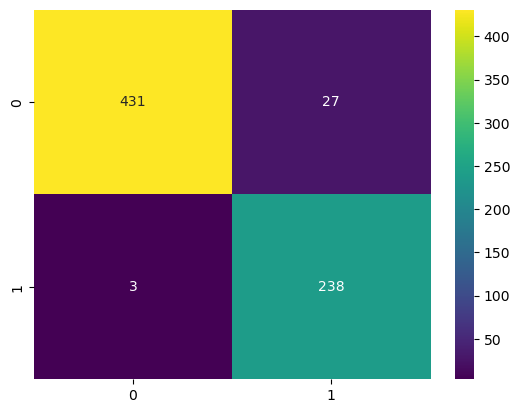

In [56]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')

# Gaussian Naive Bayes

In [59]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create Gaussian Classifier 
    model = GaussianNB()
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
        
   # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [60]:
# report classification results
agreement=(predictions==y).sum()
accuracy=agreement/y.shape[0]
print("The leave-one-out accuracy for the data set is: {0:.4f}".format(accuracy))
print(classification_report(y,predictions))

The leave-one-out accuracy for the data set is: 0.9585
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       458
           1       0.91      0.97      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



<AxesSubplot: >

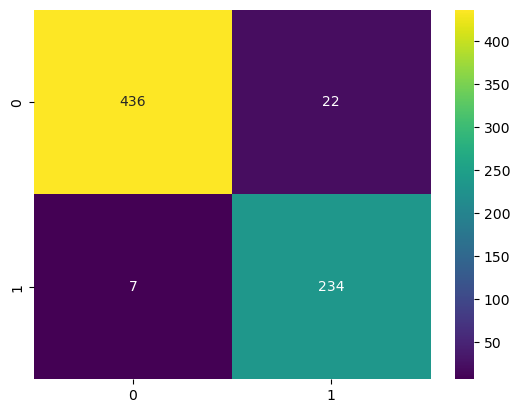

In [61]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')

# KNN Classifier 

In [62]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

k=3

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

     
    # Create KNN Classifier 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model using the training sets
    knn.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = knn.predict(X_test)
    
    # Get probability
    probability_y = knn.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [63]:
# report classification results
agreement=(predictions==y).sum()
accuracy=agreement/y.shape[0]
print("k={0},The leave-one-out accuracy is: {1:.4f}".format(k,accuracy))
print(classification_report(y,predictions))


k=3,The leave-one-out accuracy is: 0.9642
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       458
           1       0.95      0.95      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



<AxesSubplot: >

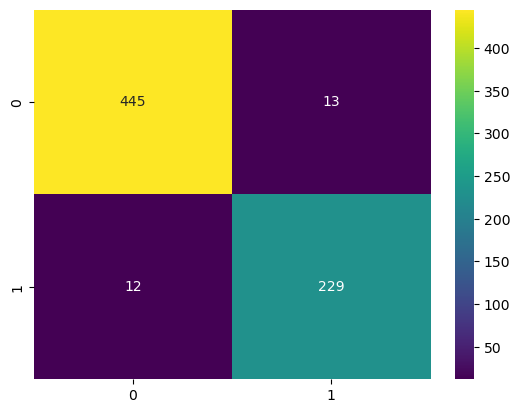

In [64]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')

# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create Random Forest Classifier 
    rfc=RandomForestClassifier()
    
    # Train the model using the training sets
    rfc.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = rfc.predict(X_test)
    
    # Get probability
    probability_y = rfc.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [94]:
# report classification results
agreement=(predictions==y).sum()
accuracy=agreement/y.shape[0]
print("k={0},The leave-one-out accuracy is: {1:.4f}".format(k,accuracy))
print(classification_report(y,predictions))

k=3,The leave-one-out accuracy is: 0.9714
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       458
           1       0.95      0.97      0.96       241

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



<AxesSubplot: >

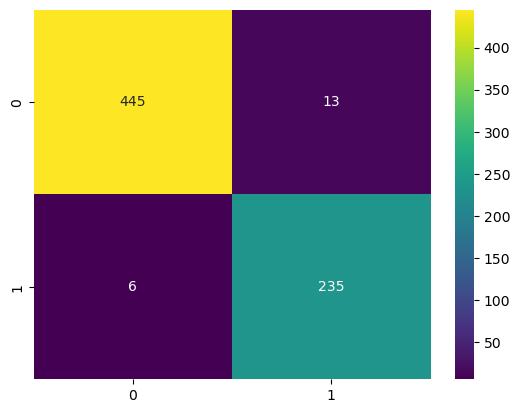

In [76]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')

# Decision Tree Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create Decision Tree Classifier 
    dt=DecisionTreeClassifier()
    
    # Train the model using the training sets
    dt.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = dt.predict(X_test)
    
    # Get probability
    probability_y = dt.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)


In [91]:
# report classification results
agreement=(predictions==y).sum()
accuracy=agreement/y.shape[0]
print("k={0},The leave-one-out accuracy is: {1:.4f}".format(k,accuracy))
print(classification_report(y,predictions))

k=3,The leave-one-out accuracy is: 0.9485
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       458
           1       0.93      0.93      0.93       241

    accuracy                           0.95       699
   macro avg       0.94      0.94      0.94       699
weighted avg       0.95      0.95      0.95       699



<AxesSubplot: >

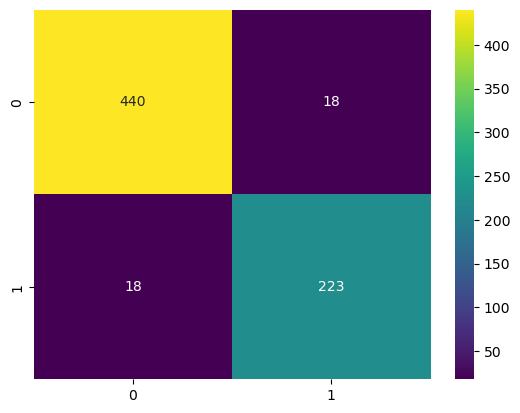

In [92]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')